# Machine learning classification tasks

Importing modules

In [89]:
import numpy as np #linear algebra
import pandas as pd #dataframes
import sklearn.preprocessing #raw data preprocessing
import sklearn.model_selection #grid search + cross validation
import sklearn.ensemble #random forest
import sklearn.tree #decision trees
import sklearn.linear_model #logistic regression + perceptron
import sklearn.svm #support vector machines
import sklearn.neighbors #k-nearest neighbors
import sklearn.neural_network #multilayer perceptron
import matplotlib.pyplot as plt #visualization
import xgboost as xgb #extreme gradient boosting

Reading the data from a csv file and saving it into a dataframe

In [2]:
data = pd.read_csv('exampleObesityClassReg.csv')

Data exploration

In [3]:
data.sample(10)

,country_name,continent,prevalence,tertile,RTDs/High-Strength Premixes,Processed Fruit and Vegetables,Processed Meat and Seafood,Ready Meals,"Rice, Pasta and Noodles","Sauces, Dressings and Condiments",...,Baby Food,Drinking Milk Products,Yoghurt and Sour Milk Products,Other Dairy,Ice Cream and Frozen Desserts,Cocoa Powder,Emulsifiers and Co-Emulsifiers,Fats and Oils,Flours,Milk
65,Israel,Asia,0.254970,3,89.666667,10523.066670,8205.066667,1653.866667,12452.000000,14407.766670,...,972.133333,55765.76667,16551.666670,10085.100000,3724.933333,333.800000,351.466667,37119.366670,26631.73333,86646.10000
24,Netherlands,Europe,0.171413,1,906.333333,24005.733330,15575.700000,7125.166667,7408.566667,14069.700000,...,1580.533333,57248.03333,33144.333330,28622.433330,5828.233333,575.833333,937.133333,25961.800000,54165.83333,112733.20000
30,Bolivia,America,0.185507,2,319.766667,632.666667,1068.633333,61.900000,34137.833330,1854.233333,...,250.033333,12939.16667,2183.066667,2325.233333,822.166667,107.200000,144.900000,9391.333333,20680.86667,15803.93333
31,Belgium,Europe,0.186661,2,392.333333,30208.200000,19078.066670,9102.933333,9166.500000,10279.066670,...,2439.633333,68413.30000,15318.966670,13231.933330,5340.300000,654.500000,690.033333,28023.700000,51698.56667,106396.26670
33,Finland,Europe,0.195756,2,7385.633333,17362.366670,16173.166670,14705.133330,8026.600000,10011.333330,...,3898.500000,129027.53330,40846.666670,13417.700000,10903.100000,428.833333,714.933333,21864.000000,43986.50000,189444.00000
26,Algeria,Africa,0.172975,2,0.000000,376.533333,783.100000,2.866667,7185.566667,1388.600000,...,358.700000,46927.70000,7724.166667,1302.866667,1267.966667,40.566667,40.766667,11299.700000,87170.73333,55217.10000
55,Spain,Europe,0.238788,3,1059.766667,22400.933330,19507.166670,7940.333333,10296.900000,10982.000000,...,2468.533333,100433.76670,17605.966670,7247.466667,6880.866667,575.666667,508.600000,29654.266670,44410.63333,125719.66670
7,Singapore,Asia,0.063294,1,72.133333,6534.000000,5255.333333,889.400000,42256.300000,5492.866667,...,1150.800000,21579.50000,2841.200000,4714.166667,4760.966667,280.533333,134.433333,14444.633330,17122.06667,26384.00000
54,Lithuania,Europe,0.238105,3,3028.733333,5672.133333,16555.633330,5563.266667,7525.733333,15141.200000,...,432.400000,33318.33333,17423.033330,10396.733330,5230.166667,185.333333,563.300000,24033.700000,30114.23333,61049.93333
71,Argentina,America,0.291443,3,244.133333,6191.133333,7668.366667,107.366667,14493.133330,7684.366667,...,770.033333,37293.83333,9990.833333,4294.766667,1868.066667,325.600000,402.200000,16529.066670,53816.06667,60104.70000


In [4]:
data.tertile.value_counts()

3    28
1    26
2    25
Name: tertile, dtype: int64

In [5]:
data.shape

(79, 52)

In [6]:
features = data[data.columns.difference(['prevalence','tertile','country_name'])]

In [7]:
feature_names = features.columns

In [8]:
features = pd.get_dummies(features)

In [9]:
labels_categorical = data.tertile

In [10]:
minMaxScaler = sklearn.preprocessing.MinMaxScaler()
features = minMaxScaler.fit_transform(features)

In [11]:
features.shape

(79, 53)

In [12]:
features_train, features_test, labels_categorical_train, labels_categorical_test = sklearn.model_selection.train_test_split(
    features,
    labels_categorical,
    test_size=0.30,
    random_state = 55,
    stratify = labels_categorical,)

In [13]:
labels_categorical_train.value_counts()

3    20
1    18
2    17
Name: tertile, dtype: int64

In [14]:
decisionTree = sklearn.tree.DecisionTreeClassifier(max_features=None, max_depth=2)
decisionTree.fit(features_train,labels_categorical_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

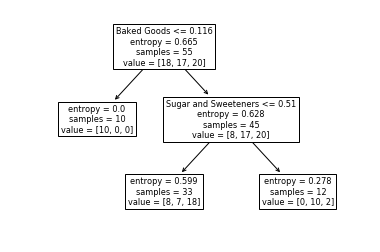

In [87]:
ax = sklearn.tree.plot_tree(decisionTree,
                       feature_names = feature_names
                      )

In [16]:
decisionTree_full = sklearn.tree.DecisionTreeClassifier(max_features=None)
decisionTree_full.fit(features_train,labels_categorical_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

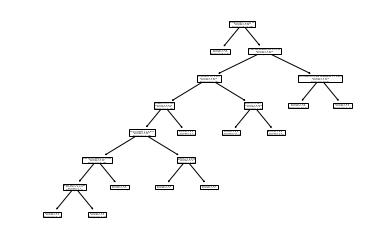

In [83]:
ax = sklearn.tree.plot_tree(decisionTree_full,
                       feature_names = feature_names
                      )
plt.savefig('tree.pdf')

In [57]:
classifier = sklearn.ensemble.RandomForestClassifier(n_estimators=100, random_state=15)

In [58]:
classifier.fit(features_train,labels_categorical_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=15, verbose=0,
                       warm_start=False)

In [59]:
predictions = classifier.predict(features_test)

In [60]:
print(sklearn.metrics.confusion_matrix(predictions, labels_categorical_test))

[[8 2 0]
 [0 2 3]
 [0 4 5]]


In [61]:
print(sklearn.metrics.classification_report(predictions, labels_categorical_test))

              precision    recall  f1-score   support

           1       1.00      0.80      0.89        10
           2       0.25      0.40      0.31         5
           3       0.62      0.56      0.59         9

    accuracy                           0.62        24
   macro avg       0.62      0.59      0.59        24
weighted avg       0.70      0.62      0.66        24



In [62]:
classifier.feature_importances_

array([0.03535245, 0.05917048, 0.01772211, 0.02282467, 0.01047904,
       0.02279358, 0.01690349, 0.06316977, 0.01875286, 0.01146245,
       0.01625101, 0.01876446, 0.01372079, 0.00640903, 0.01168312,
       0.01479568, 0.02140981, 0.03541351, 0.02552112, 0.02293573,
       0.02312079, 0.01141051, 0.00487104, 0.0126867 , 0.02119149,
       0.02304077, 0.03041445, 0.0115778 , 0.01456755, 0.00818528,
       0.02302183, 0.01016322, 0.00989758, 0.02795535, 0.01759997,
       0.02086595, 0.01249648, 0.01221615, 0.01382274, 0.01562947,
       0.03313182, 0.02585701, 0.04118129, 0.01848931, 0.038941  ,
       0.00543278, 0.01558954, 0.01634814, 0.00175912, 0.00168798,
       0.00568349, 0.00562822, 0.        ])

In [63]:
vil = pd.DataFrame(list(zip(feature_names,classifier.feature_importances_)),
                   columns=['feature','mean_gini_decrease']
                  ).sort_values(by='mean_gini_decrease', ascending=False)

In [64]:
vil.head()

,feature,mean_gini_decrease
7,Cheese,0.063170
1,Baked Goods,0.059170
42,Sugar and Sweeteners,0.041181
44,Tea,0.038941
17,Fish and Seafood,0.035414


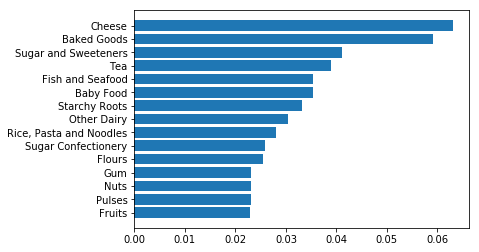

In [86]:
ax = plt.barh(data = vil.sort_values(by='mean_gini_decrease').tail(15), 
         y='feature', 
         width = 'mean_gini_decrease'
        )

In [66]:
rf_vil  = []
for i in range(50):
    rf = sklearn.ensemble.RandomForestClassifier(n_estimators=100)
    rf = rf.fit(features_train,labels_categorical_train)
    rf_vil.append(rf.feature_importances_)
mean_vil = np.mean(rf_vil, axis = 0)

In [67]:
mean_vil = pd.DataFrame(list(zip(feature_names,mean_vil)),
                   columns=['feature','mean_gini_decrease']
                  ).sort_values(by='mean_gini_decrease', ascending=False)

In [68]:
mean_vil.head()

,feature,mean_gini_decrease
7,Cheese,0.052412
42,Sugar and Sweeteners,0.046706
1,Baked Goods,0.045241
17,Fish and Seafood,0.037781
40,Starchy Roots,0.036491


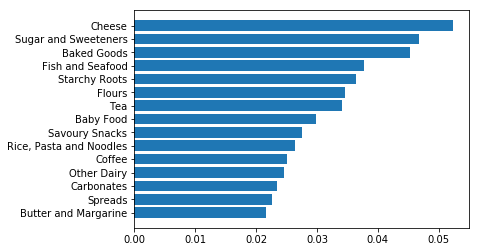

In [85]:
ax = plt.barh(data = mean_vil.sort_values(by='mean_gini_decrease').tail(15), 
         y='feature', 
         width = 'mean_gini_decrease'
        )

In [105]:
models = []

models.append(("LogisticRegression",sklearn.linear_model.LogisticRegression()))
models.append(("SVC",sklearn.svm.SVC()))
models.append(("RandomForest",sklearn.ensemble.RandomForestClassifier()))
models.append(("KNeighbors",sklearn.neighbors.KNeighborsClassifier()))
models.append(("MLPClassifier",sklearn.neural_network.MLPClassifier()))
models.append(("XGBoost",xgb.XGBClassifier()))
models.append(("DecisionTree",sklearn.tree.DecisionTreeClassifier()))


results = []
names = []
for name,model in models:
    result = sklearn.model_selection.cross_val_score(model, 
                             features, 
                             labels_categorical,  
                             cv=10, 
                             scoring='accuracy',
                             n_jobs=-1
                            )
    names.append(name)
    results.append(result)

In [106]:
models

[('LogisticRegression',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='warn', n_jobs=None, penalty='l2',
                     random_state=None, solver='warn', tol=0.0001, verbose=0,
                     warm_start=False)),
 ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
      decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
      kernel='rbf', max_iter=-1, probability=False, random_state=None,
      shrinking=True, tol=0.001, verbose=False)),
 ('RandomForest',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                         max_depth=None, max_features='auto', max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_e

(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text xticklabel objects>)

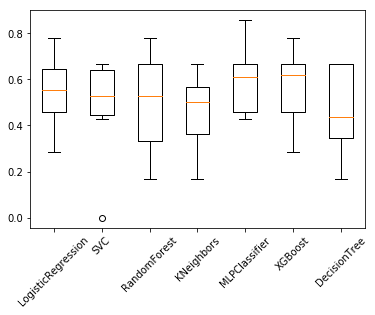

In [110]:
plt.boxplot(results,labels = names)
plt.xticks(rotation=45)

In [ ]:
#compare the models based on their f1-score, what is the problem?

In [73]:
parameters = {'n_estimators': list(range(260,360,20)),
              'max_features': ['auto', 'sqrt'],
              'max_depth': list(range(20,100,20))+[None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'bootstrap': [True, False]
}
grid_Search = sklearn.model_selection.GridSearchCV(sklearn.ensemble.RandomForestClassifier(), 
                                                   parameters, 
                                                   n_jobs=-1,
                                                   cv = 3
                                                  )

grid_Search.fit(features_train,labels_categorical_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [74]:
grid_Search.best_params_

{'bootstrap': True,
 'max_depth': 40,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 320}

In [75]:
pd.DataFrame(grid_Search.cv_results_).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.177183,0.003279,0.015957,8.144908e-04,True,20,auto,1,2,260,"{'bootstrap': True, 'max_depth': 20, 'max_feat...",0.578947,0.684211,0.588235,0.618182,0.048115,327
1,0.194480,0.004953,0.018949,1.410627e-03,True,20,auto,1,2,280,"{'bootstrap': True, 'max_depth': 20, 'max_feat...",0.473684,0.684211,0.529412,0.563636,0.090441,892
2,0.208110,0.001695,0.017951,8.143934e-04,True,20,auto,1,2,300,"{'bootstrap': True, 'max_depth': 20, 'max_feat...",0.631579,0.631579,0.529412,0.600000,0.047213,630
3,0.232046,0.009080,0.019282,4.701340e-04,True,20,auto,1,2,320,"{'bootstrap': True, 'max_depth': 20, 'max_feat...",0.631579,0.736842,0.588235,0.654545,0.062297,5
4,0.250331,0.016629,0.020944,4.495664e-07,True,20,auto,1,2,340,"{'bootstrap': True, 'max_depth': 20, 'max_feat...",0.631579,0.684211,0.529412,0.618182,0.063275,327
5,0.213762,0.015023,0.017287,1.243879e-03,True,20,auto,1,5,260,"{'bootstrap': True, 'max_depth': 20, 'max_feat...",0.578947,0.684211,0.529412,0.600000,0.064366,630
6,0.212765,0.019379,0.023936,1.058615e-02,True,20,auto,1,5,280,"{'bootstrap': True, 'max_depth': 20, 'max_feat...",0.578947,0.684211,0.529412,0.600000,0.064366,630
7,0.233376,0.008264,0.018617,4.703026e-04,True,20,auto,1,5,300,"{'bootstrap': True, 'max_depth': 20, 'max_feat...",0.526316,0.736842,0.529412,0.600000,0.099421,630
8,0.266952,0.016774,0.026263,6.165930e-03,True,20,auto,1,5,320,"{'bootstrap': True, 'max_depth': 20, 'max_feat...",0.578947,0.736842,0.647059,0.654545,0.065813,5
9,0.284240,0.020777,0.028258,5.777035e-03,True,20,auto,1,5,340,"{'bootstrap': True, 'max_depth': 20, 'max_feat...",0.631579,0.736842,0.529412,0.636364,0.083852,69


In [76]:
predictions = grid_Search.predict(features_test)

In [77]:
print(sklearn.metrics.confusion_matrix(predictions, labels_categorical_test))

[[7 3 0]
 [0 2 3]
 [1 3 5]]


In [78]:
print(sklearn.metrics.classification_report(predictions, labels_categorical_test))

              precision    recall  f1-score   support

           1       0.88      0.70      0.78        10
           2       0.25      0.40      0.31         5
           3       0.62      0.56      0.59         9

    accuracy                           0.58        24
   macro avg       0.58      0.55      0.56        24
weighted avg       0.65      0.58      0.61        24



In [ ]:
#make your own grid search